In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d
from astropy import units as u
from astropy.coordinates import SkyCoord
from tqdm import *
import pandas as pd
from scipy.stats import chi2
import healpy as hp

from subhalos import SubhaloSample
import pdf_sampler
from units import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
GN = 6.67e-11*Meter**3/Kilogram/Sec**2

In [3]:
sample = SubhaloSample()
sample.get_sh_sample()

In [4]:
# def generate_stars(density=5e5, llims=[0, 360], blims=[-90, 90]):
#     area = (llims[1] - llims[0])*(blims[1] - blims[0])
#     n_stars = np.random.poisson(area*density)
#     print("Generating", n_stars, "stars")
#     l_coords = (llims[1]-llims[0])*np.random.random_sample(n_stars) + llims[0]
#     b_coords = (blims[1]-blims[0])*np.random.random_sample(n_stars) + blims[0]
#     return l_coords, b_coords

# def deflection_theta_ps(pos_s, pos_l, M_l, dl):
#     b_sl_vec = (np.array(pos_s) - np.array(pos_l))*dl
#     b_sl_norm = np.linalg.norm(b_sl_vec)
#     b_sl_unit = b_sl_vec/b_sl_norm
#     return (4*GN*M_l/b_sl_norm)*b_sl_unit

In [5]:
# l_stars, b_stars = generate_stars(density=20, llims=[180, 185], blims=[0, 5])

In [6]:
poss_l = np.transpose([sample.coords_galactic.l.value,sample.coords_galactic.b.value])
# poss_s = np.transpose([l_stars,b_stars])
r_l = sample.coords_galactic.distance.value*kpc

In [7]:
# from numpy.random import multivariate_normal
# velocities = multivariate_normal([0, 0, 0],np.array([[220/np.sqrt(3.),0,0],[0,220/np.sqrt(3.),0],[0,0,220/np.sqrt(3.)]])**2, len(sample.coords_galactic.l.value))

In [8]:
sample.coords_gc.galcen_v_sun

<CartesianDifferential (d_x, d_y, d_z) in km / s
    (11.1, 232.24, 7.25)>

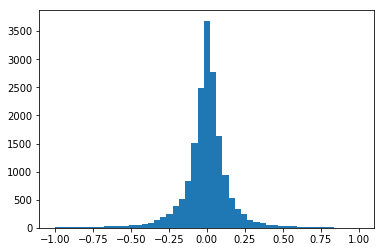

In [9]:
plt.hist(sample.coords_galactic.pm_b.value, bins=np.linspace(-1,1.));

In [14]:
# plt.hist(sample.coords_galactic_nosunv.pm_b.value, bins=np.linspace(-1,1.));

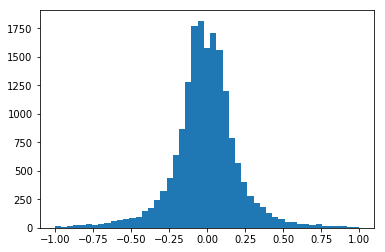

In [11]:
plt.hist(sample.coords_galactic.pm_l_cosb.value, bins=np.linspace(-1.,1.));

In [13]:
# plt.hist(sample.coords_galactic_nosunv.pm_l_cosb.value, bins=np.linspace(-1.,1.));

In [77]:
from astropy.coordinates import SkyCoord, Galactic, Galactocentric

In [25]:
c3 = SkyCoord("galactic", l=sample.coords_galactic.l.value*u.deg, b=sample.coords_galactic.b.value*u.deg)

In [90]:
for istar in tqdm_notebook(range(len(poss_s))):    
    for ish in range(len(poss_s)):
        deflection_theta_ps(poss_s[istar], poss_l[ish], sample.m_sample[ish], r_l[ish])

NameError: name 'poss_s' is not defined

In [91]:
_, m_bins = np.histogram(np.log10(sample.m_sample/M_s), bins=np.linspace(6,11,50))
m_binc = (m_bins[1:] + m_bins[:-1])/2.
y_num = np.array([quad(lambda m: sample.rho_m(m), 10**m_bins[i], 10**m_bins[i+1])[0] for i in range(len(m_bins)-1)])

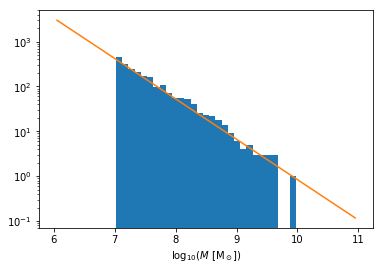

In [40]:
plt.hist(np.log10(sample.m_sample/M_s), bins=np.linspace(6,11,50));
plt.plot(m_binc, 3000*y_num/y_num[0])
plt.xlabel("$\log_{10}(M$ [M$_\odot$])")
plt.yscale("log")

In [41]:
_, r_bins = np.histogram(sample.r_sample, bins=np.linspace(0,1000,40)*kpc)
r_binc = (r_bins[1:] + r_bins[:-1])/2.
y_num = np.array([quad(lambda r: r**2*sample.rho_ein(r), r_bins[i], r_bins[i+1])[0] for i in range(len(r_bins)-1)])

Text(0.5,0,'$r$ [kpc]')

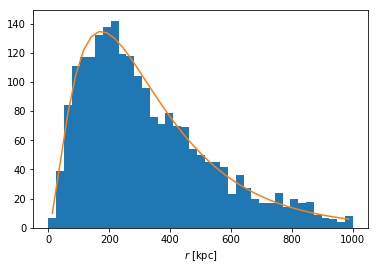

In [42]:
plt.hist((sample.r_sample/kpc), bins=np.linspace(0,1000,40));
plt.plot(r_binc/kpc, y_num/y_num[0]*10.)
plt.xlabel("$r$ [kpc]")

In [77]:
# Units
kpc = 1.e-3*Mpc
asctorad = np.pi/648000.
radtoasc = 648000./np.pi

In [79]:
np.sqrt(0.009*(180/np.pi)**2)

5.4355549072846

In [81]:
0.88e9*(180/np.pi)**-2

268063.3294123035

In [23]:
from astropy.coordinates import Galactic, Galactocentric
gc = Galactocentric(x=103*u.pc, y=-11*u.pc, z=93.*u.pc,v_x = 1*u.km/u.s, v_y = 1*u.km/u.s, v_z = 1*u.km/u.s)
gc.transform_to(Galactic)

<Galactic Coordinate: (l, b, distance) in (deg, deg, pc)
    (359.92504817, 0.63631525, 8403.22247435)
 (pm_l_cosb, pm_b, radial_velocity) in (mas / yr, mas / yr, km / s)
    (-5.80523868, -0.15497596, -9.84606997)>

Coordinate grid

In [26]:
################## Input parameters ############################

# Define size of grid
nx = 101
ny = 101

# Define coordinate limits (e.g. in arcsecs)
xlims = [-2.5, 2.5]
ylims = [-2.5, 2.5]

In [29]:
# Get xy coordinates
x = (xlims[1] - xlims[0]) * np.outer(np.ones(ny), np.arange(nx)) / float(nx-1) + xlims[0]
y = (ylims[1] - ylims[0]) * np.outer(np.arange(ny), np.ones(nx)) / float(ny-1) + ylims[0]

In [35]:
[x[ix, iy],y[ix, iy]]

[2.5, 2.5]

In [43]:
deflection_map_x = np.zeros(np.shape(x))
deflection_map_y = np.zeros(np.shape(x))

for ix in tqdm_notebook(range(nx)):
    for iy in range(ny):
        for ish in range(len(poss_s)):
            defl = deflection_theta_ps([x[ix, iy],y[ix, iy]], poss_l[ish], sample.m_sample[ish], r_l[ish])  
            deflection_map_x[ix,iy] = defl[0]
            deflection_map_y[ix,iy] = defl[1]

In [59]:
def deflection_theta_ps(pos_s, pos_l, M_l, dl):
    b_sl_vec = (np.array(pos_s) - np.array(pos_l))*dl
    b_sl_norm = np.abs(np.linalg.norm(b_sl_vec))
    b_sl_unit = b_sl_vec/b_sl_norm
    return (4*GN*M_l/b_sl_norm)*b_sl_unit

In [60]:
deflection_map_x = np.zeros(np.shape(x))
deflection_map_y = np.zeros(np.shape(x))

for ix in tqdm_notebook(range(nx)):
    for iy in range(ny):
        defl = deflection_theta_ps([x[ix, iy],y[ix, iy]], [0.,0.], 1e2*M_s, 200.*kpc)  
        deflection_map_x[ix,iy] = defl[0]
        deflection_map_y[ix,iy] = defl[1]

/home/sm8383/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/home/sm8383/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


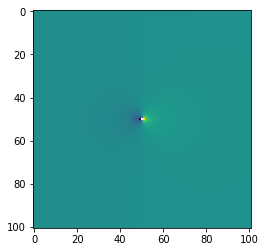

In [61]:
plt.imshow(deflection_map_x)

In [65]:
Y

array([[0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7]])

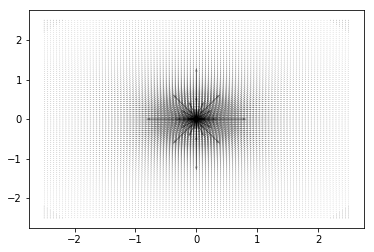

In [80]:
# plt.axes([-0.5, -0.5, 0.5, 0.5])
plt.quiver(x, y, -deflection_map_x, -deflection_map_y, alpha=.5)
# plt.quiver(X, Y, U, V, edgecolor='k', facecolor='None', linewidth=.5)

# plt.xlim(-1, n)
# plt.xticks(())
# plt.ylim(-1, n)
# plt.yticks(())


In [82]:
U[0][0]

-11.071067811865474

In [84]:
V[0][1]

-9.0

([], <a list of 0 Text yticklabel objects>)

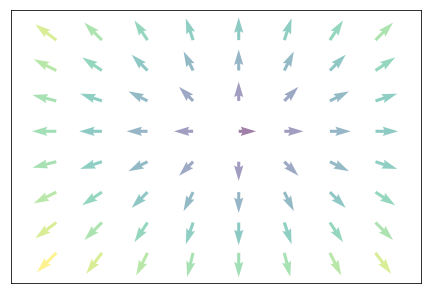

In [70]:
n = 8
X, Y = np.mgrid[0:n, 0:n]
T = np.arctan2(Y - n / 2., X - n/2.)
R = 10 + np.sqrt((Y - n / 2.0) ** 2 + (X - n / 2.0) ** 2)
U, V = R * np.cos(T), R * np.sin(T)

plt.axes([0.025, 0.025, 0.95, 0.95])
plt.quiver(X, Y, U, V, R, alpha=.5)
# plt.quiver(X, Y, U, V, edgecolor='k', facecolor='None', linewidth=.5)

plt.xlim(-1, n)
plt.xticks(())
plt.ylim(-1, n)
plt.yticks(())
